# Bee Population Data EDA

This notebook emphasizes time series EDA for annual colony counts across states in the United States of America. As cited by the Australian Academy of Science, a standard honeybee hive houses approximately 60,000 to 80,000 individuals. Utilizing time-series methodologies, our objective is to discern patterns and fluctuations in bee populations over time. Later, we will be employing air quality metrics to possibly predict and forecast changes in bee populations.

In [16]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# !pip install folium
import folium
# !pip install geopandas
import geopandas as gpd

---
### Loading bee data and extracting essential insights from the DataFrame.

In [17]:
df_bee = pd.read_csv('../data/Data_Bees/processed_dfs/state_survey_processed.csv')
df_bee.drop(columns = ['Unnamed: 0'], inplace = True)
df_bee.set_index(['Year'])

,State,Value
Year,,
1987,alabama,46000
1987,arizona,80000
1987,arkansas,29000
1987,california,540000
1987,colorado,44000
...,...,...
2017,wyoming,6100
2017,wyoming,60500
2017,wyoming,47000


In [18]:
# Dataframe information
print('Data Frame Shape:', '\n', df_bee.shape, '\n')
print('=' *40)

print(df_bee.info(), '\n')
print('=' *40)

Data Frame Shape: 
 (1838, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    1838 non-null   int64 
 1   State   1838 non-null   object
 2   Value   1838 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 43.2+ KB
None 



---
### Summary Statistics

In [19]:
df_bee.describe()

,Year,Value
count,1838.000000,1.838000e+03
mean,2005.515778,8.619321e+04
std,10.077950,2.623390e+05
min,1987.000000,0.000000e+00
25%,1996.250000,9.000000e+03
50%,2007.000000,2.700000e+04
75%,2015.000000,7.100000e+04
max,2017.000000,4.800000e+06


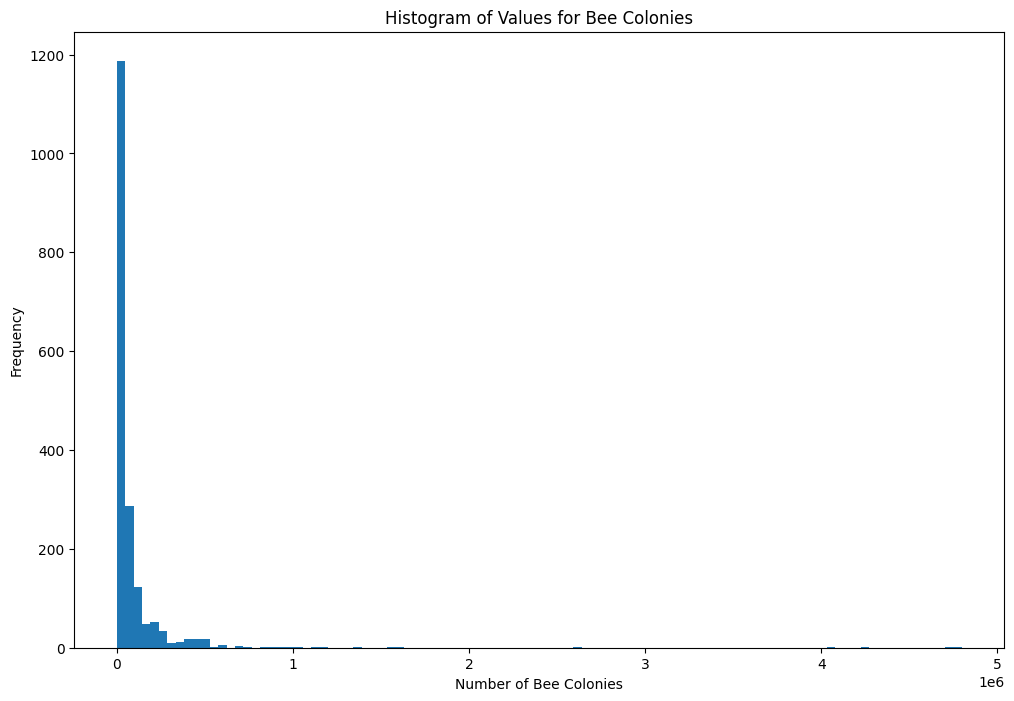

In [20]:
# Plotting a histogram of the Value column, representing the number of Bee colonies
plt.figure(figsize = (12, 8))
df_bee['Value'].plot(kind = 'hist', bins = 100)
plt.title('Histogram of Values for Bee Colonies')
plt.xlabel('Number of Bee Colonies')
# Saving Figure to Images Folder
plt.savefig('../images/hist_bee_values')

---
### Map Visualization of Bee Colony Values in the United States

*citations:*
[StackOverflow]('https://stackoverflow.com/questions/78004175/python-folium-combine-states-in-choropleth-map-of-usa'), [GeoPandas documentation]('https://geopandas.org/en/stable/getting_started/install.html'), [Folium]('https://python-visualization.github.io/folium/latest/index.html'), [GeoPandas plotting polygons]('https://geopandas.org/en/stable/gallery/polygon_plotting_with_folium.html')

In [14]:
df_bee_avg = df_bee.groupby('State')['Value'].mean()

# Download US states map
# Download the US states GeoJSON file
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'
us_states_geojson = gpd.read_file(url)
us_states_geojson['name'] = us_states_geojson['name'].str.lower()

#merge map and df_bee_avg
merged_geo = us_states_geojson.merge(df_bee_avg, how = 'left', left_on = 'name', right_on  = 'State')


# Create a Folium map centered on the US
bee_map = folium.Map(location=[37, -102], zoom_start=4)


# mapping with folium.Chorapleth()
folium.Choropleth(
    geo_data = us_states_geojson,
    name = 'choropleth',
    data = merged_geo, 
    columns = ['name', 'Value'],
    key_on = 'feature.properties.name',
    fill_color = 'YlGnBu',
    fill_opacity = 0.3,
    line_opacity = 0.7, 
    legend_name = 'Bee Colony Values'
).add_to(bee_map)


# saving map
bee_map.save('../images/bee_map.html')  #display in readme using ,img src = 'bee_map.html'

#display map
bee_map

#NOTE ON SSL ERROR: ONE OF OUR MACHINES HAS A PROBLEM WITH SSL CERTIFICATION BUT THIS SHOULD WORK FINE FOR OTHER MACHINES. 
# IN THE CASE OF AN ERROR 
# DOWNLOAD 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json' AS A JSON FILE INTO REPOSITORY 
#  CREATE A JSON OBJECT ABOVE IN PLACE OF THE URL 

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)>

## Graph Visualizations of Bee Colony Counts Across States, 1987-2017

* The line plots depict the evolution of bee colony counts in each state over the period 1987 to 2017.
    * The initial plot showcases all 50 states together for a comprehensive overview.
    * The second plot shows bee colonies by region, as specified in this dictionary:

* A bar plot shows the average number of bee colonies over the years for each state.

* 
citation: [GitHubGist us_regions.py]('https://gist.github.com/sfirrin/fd01d87f022d80e98c37a045c14109fe')

In [21]:
# Capitalize states, to match dictionary
df_bee['State'] = df_bee['State'].str.capitalize()
# Add 'Region' column to df_bee

states_to_regions = {
    'Washington': 'West', 'Oregon': 'West', 'California': 'West', 'Nevada': 'West',
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Utah': 'West',
    'Colorado': 'West', 'Alaska': 'West', 'Hawaii': 'West', 'Maine': 'Northeast',
    'Vermont': 'Northeast', 'New York': 'Northeast', 'New Hampshire': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New Jersey': 'Northeast', 'Pennsylvania': 'Northeast', 'North Dakota': 'Midwest',
    'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',
    'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest', 'Wisconsin': 'Midwest',
    'Illinois': 'Midwest', 'Michigan': 'Midwest', 'Indiana': 'Midwest', 'Ohio': 'Midwest',
    'West Virginia': 'South', 'District of Columbia': 'South', 'Maryland': 'South',
    'Virginia': 'South', 'Kentucky': 'South', 'Tennessee': 'South', 'North Carolina': 'South',
    'Mississippi': 'South', 'Arkansas': 'South', 'Louisiana': 'South', 'Alabama': 'South',
    'Georgia': 'South', 'South Carolina': 'South', 'Florida': 'South', 'Delaware': 'South',
    'Arizona': 'Southwest', 'New Mexico': 'Southwest', 'Oklahoma': 'Southwest',
    'Texas': 'Southwest'}

# Creating a column for the region associated to each state
df_bee['Region'] = df_bee['State'].map(states_to_regions)

In [ ]:
# Plot bee values for all states, all years
plt.figure(figsize=(12, 8));
sns.lineplot(data=df_bee, x='Year', y='Value', hue='State');
plt.title('Bee Colony Values for States, from 1987 to 2017');
plt.xlabel('Year');
plt.ylabel('Value');
plt.legend(title='State', bbox_to_anchor=(1.05, 1));
plt.xticks(rotation=45);
# Saving Figure to Images Folder
plt.savefig('../images/line_colony_values_state_allyears')



# Plot bee values for regions, all years
df_region_year = df_bee.groupby(['Year', 'Region'])['Value'].mean().reset_index()
# Plotting the line plot
plt.figure(figsize=(12, 8));
sns.lineplot(data=df_region_year, x='Year', y='Value', hue='Region', palette='tab10');
plt.title('Bee Colony Values for Each Region, 1987-2017');
plt.xlabel('Year');
plt.ylabel('Value');
plt.legend(title='Region');
plt.xticks(rotation=45);
# Saving Figure to Images Folder
plt.savefig('../images/line_colony_values_regions_allyears')



# Plot bar graph for average number of bee colonies per state
plt.figure(figsize = (24, 12))
df_bee.groupby('State')['Value'].mean().sort_values().plot(kind = 'bar');
plt.title('Mean Value of Bee Colonies by State (1987 - 2017)', size = 20);
plt.xlabel('State', size = 15);
plt.ylabel('Mean Value', size = 15);
plt.xticks(rotation=45, size = 15, ha = 'right');
plt.yticks(size = 15)
# Saving Figure to Images Folder
plt.savefig('../images/bar_mean_colony_values')


# Boxplots for bee colonies in each state, y axis is limited for readability.
plt.figure(figsize=(12, 8));
sns.boxplot(data=df_bee, x='State', y='Value', hue = 'State');
plt.title('Distribution of Bee Colonies by State (1987-2017)');
plt.xlabel('State');
plt.ylabel('Bee Colonies');
plt.xticks(rotation=90)  
plt.ylim(0, 700000)
# Saving Figure to Images Folder
plt.savefig('../images/boxplot_bee_colonies_all_states')

**Interpretation:**
There is a noticeable spike in the data in 2014, but my research has not identified the cause. Interestingly, despite the spike, 2014 saw significant colony loss, which contradicts this data. Further investigation is needed.

The Western United States has the highest number of bee colonies, likely due to its large agricultural economy that relies on bees for crop pollination. In contrast, the Midwest and Northeast have the fewest colonies, possibly due to harsh winters that make survival difficult for bees.

An important note: There are outlier values for some states with bigger bee colony numbers that made the boxpot figure unreadable. For example, California has an outlier value greater than 5.5 million. For improved readability, the y-axis was limited to 700,000.

---
## Setting up a time series for further EDA

In [22]:
df_bee['Year'] = pd.to_datetime(df_bee['Year'], format = '%Y' )
df_bee.set_index('Year', inplace = True)
df_bee.index = df_bee.index.strftime('%Y')
bees_by_year = df_bee.groupby(by = 'Year')[['Value']].sum()

### Decomposing the time series using seasonal_decompose from statsmodels
This will help confirm there are no multiyear seasonal patterns in the data.

<Figure size 3000x2000 with 0 Axes>

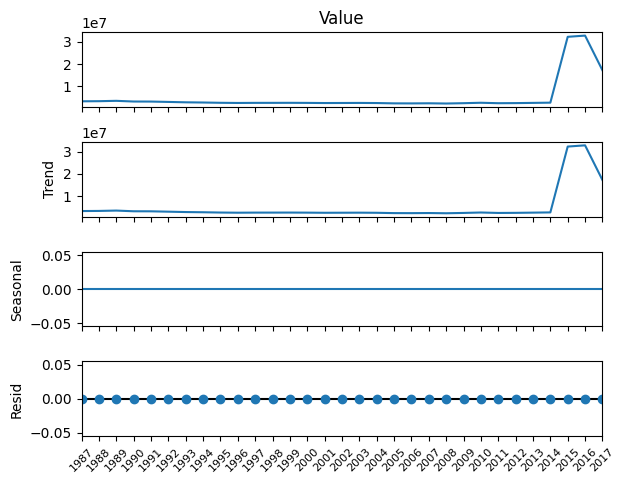

In [23]:
plt.figure(figsize = (30, 20))
seasonal_decompose(bees_by_year['Value'], period = 1).plot(); # defaults to additive model
plt.xticks(rotation=45, size = 8);


### Using Autocorrelation and Autocorrelation to uncover further patterns

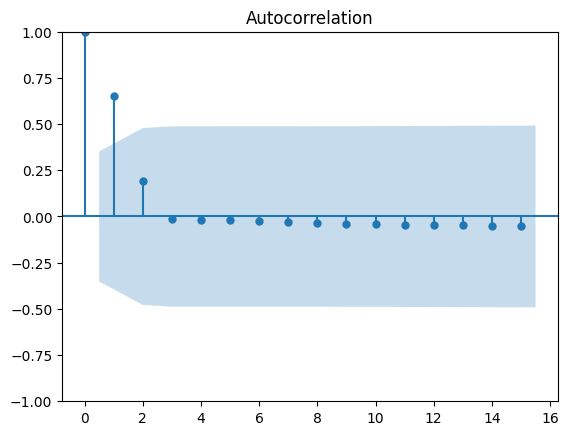

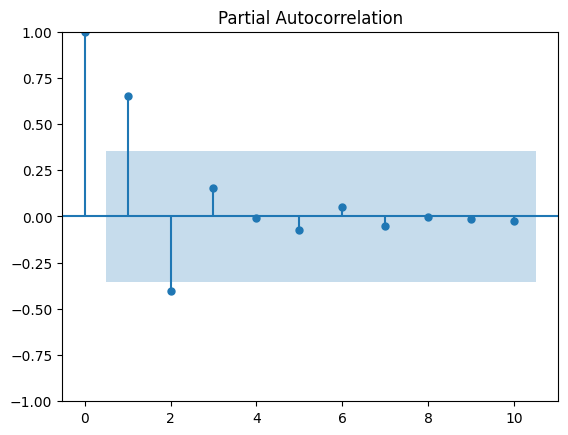

In [24]:
# Autocorrelation and partial autocorrelations plots
plot_acf(bees_by_year['Value']);
plot_pacf(bees_by_year['Value'], lags = 10);

# lag of 1 is significant, otherwise no


**Conclusions on time-series EDA**: there are no seasonal patterns in the data and the data doesn't have significant autocorrelation or partial autocorrelation patterns. 